In [1]:
import sys
import argparse

import matplotlib.pyplot as plt
import pickle

import numpy as np
import pandas as pd

import glob

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve, f1_score, auc

In [2]:
PATH_data = '../results/th_dog/'

In [3]:
samples_path = sorted(glob.glob(f'{PATH_data}/*'), reverse=True)

In [4]:
xs = []
for i, name in zip(range(1,len(samples_path)+1),sorted(samples_path, reverse=True)):
    xs.append((i,name.strip('./results/th_dog/dog_cat_').strip('ub.csv')))

In [5]:
xs

[(1, '0.5'), (2, '0.4'), (3, '0.3'), (4, '0.2'), (5, '0.1'), (6, '0.05')]

In [6]:
label = ["blank"]
x_pos = []
y_roc = []
y_pr = []
errors = [[],[]]
dots_roc = []
dots_pr = []

c = 0

for sample in sorted(samples_path, reverse=True):
    
    c += 1
    
    sample_name = sample.split('/')[-1]
    df_metrics = pd.read_csv(f'{sample}/results/{sample_name}_metrics.csv', index_col=0)
    
#     print (df_metrics)

    label.append(sample.strip('./results/th_dog/dog_cat_').strip('ub.csv'))
    x_pos.append(c)
    y_pr.append(df_metrics.loc['all','auPR'])
    dots_pr.append(list(df_metrics.iloc[0:5,3]))
    y_roc.append(df_metrics.loc['all','auROC'])
    dots_roc.append(list(df_metrics.iloc[0:5,2]))
    
   
    
    
    
    
# print()

# print(label)
# print(x_pos)
# print(y_pr)
# print(y_roc)
# print(errors)
# print(dots_roc)
# print(dots_pr)  
    
    

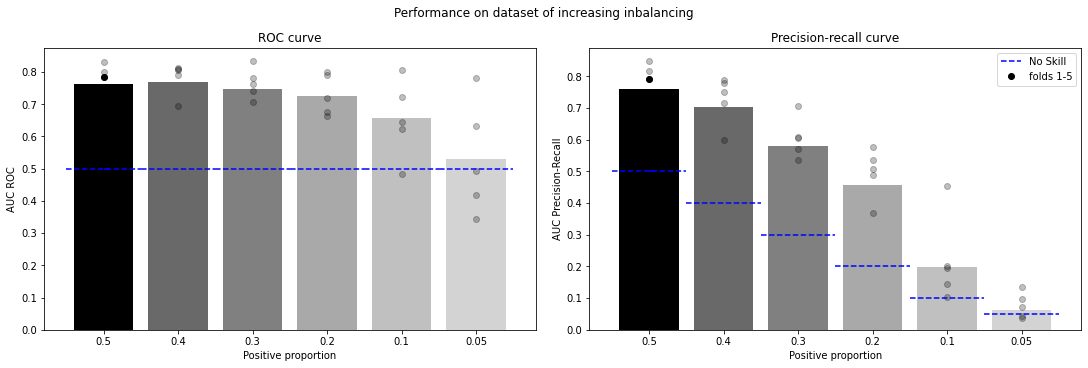

In [10]:
colours = ['black', 'dimgray', 'gray', 'darkgray', 'silver', 'lightgray']


fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(15,5), constrained_layout=True,)

_ = fig.suptitle(f'Performance on dataset of increasing inbalancing')

_ = ax1.set_title('ROC curve')
_ = ax1.set_xlabel('Positive proportion')
_ = ax1.set_ylabel('AUC ROC')
_ = ax1.plot([1, 1.1], [0.5, 0.5], label = 'No Skill', linestyle='--', color = 'blue')
_ = ax1.plot(x_pos[0], dots_roc[0][0], linestyle='none', marker='o', color='black', label='folds 1-5')
_ = ax1.plot(x_pos, dots_roc, linestyle='none', marker='o', color='black', alpha = 0.25)

_ = ax1.set_xticklabels(label)



_ = ax2.set_title('Precision-recall curve')
_ = ax2.set_xlabel('Positive proportion')
_ = ax2.set_ylabel('AUC Precision-Recall')
_ = ax2.plot([1, 1.1], [0.5, 0.5], linestyle='--', label='No Skill', color = 'blue')
_ = ax2.plot(x_pos[0], dots_pr[0][0], linestyle='none', marker='o', color='black', label='folds 1-5')
_ = ax2.plot(x_pos, dots_pr, linestyle='none', marker='o', color='black', alpha = 0.25)
_ = ax2.set_xticklabels(label)

count = 0

for sample, x in zip(samples_path, xs):
    
    sample_name = sample.split('/')[-1]
    
    df_metrics = pd.read_csv(f'{sample}/results/{sample_name}_metrics.csv', index_col=0)
    
    all_roc = df_metrics.loc['all','auROC']
    all_pr = df_metrics.loc['all','auPR']
    
#     _ = ax1.bar(x[0], all_roc, width=0.8, label=sample_name.strip('ub.csv_result') )
    _ = ax1.bar(x[0], all_roc, width=0.8, color = colours[count])
    _ = ax1.plot([x[0]-0.5,x[0]+0.5],[0.5,0.5], linestyle='--', color = 'blue')
    
    
    _ = ax2.bar(x[0], all_pr, width=0.8, color = colours[count] )
    _ = ax2.plot([x[0]-0.5, x[0]+0.5], [float(x[1]), float(x[1])], linestyle='--', color = 'blue')
    

#     _ = ax1.legend()
    _ = ax2.legend()
    
    count += 1
    
            
plt.savefig(f'unbalancing_test_predictions_result.png')